In [25]:
# Pacotes básicos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pacotes do Scikit-learn para acesso a datasets, preparação, modelagem e avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Pacotes para modelos de aprendizado
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pacote de balanceamento de classes desbalanceadas
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_curve, roc_auc_score

In [26]:
df = pd.read_csv("treino.csv")
print(df.dtypes)
df.head()

IDpassageiro      object
Nome              object
Deck              object
NumeroCabine       int64
PosicaoCabine     object
Procedencia       object
Destino           object
Idade            float64
VIP                int64
AllInclusive       int64
ServicoCabine    float64
Restaurante      float64
Shopping         float64
SPA              float64
ParquedeAguas    float64
Sobrevivente       int64
dtype: object


,IDpassageiro,Nome,Deck,NumeroCabine,PosicaoCabine,Procedencia,Destino,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
0,5647_02,Chabih Matoltuble,C,178,P,America,Monaco,52.0,0,0,0.0,1425.0,31.0,0.0,1320.0,1
1,0107_01,Coobix Hart,D,2,S,Africa,Grecia,21.0,0,0,1743.0,5.0,17.0,0.0,0.0,0
2,4158_01,Doryn Noeley,E,273,S,Europa,Grecia,27.0,0,0,0.0,0.0,580.0,211.0,0.0,0
3,1316_01,Sadrus Quelfly,E,95,S,America,Grecia,28.0,0,1,0.0,0.0,0.0,0.0,0.0,1
4,9069_05,Mirfark Taketiatim,B,297,P,America,Monaco,29.0,0,0,0.0,12563.0,0.0,3.0,5057.0,0


In [27]:
print(df.shape)

(7124, 16)


In [28]:
df.isnull().any()

IDpassageiro     False
Nome             False
Deck             False
NumeroCabine     False
PosicaoCabine    False
Procedencia      False
Destino          False
Idade            False
VIP              False
AllInclusive     False
ServicoCabine    False
Restaurante      False
Shopping         False
SPA              False
ParquedeAguas    False
Sobrevivente     False
dtype: bool

In [29]:
df.describe()

,NumeroCabine,Idade,VIP,AllInclusive,ServicoCabine,Restaurante,Shopping,SPA,ParquedeAguas,Sobrevivente
count,7124.000000,7124.000000,7124.000000,7124.000000,7124.00000,7124.000000,7124.00000,7124.000000,7124.000000,7124.000000
mean,603.314570,28.709714,0.023582,0.350225,211.90539,451.186272,164.56050,296.767827,302.433605,0.506457
std,514.229314,14.480996,0.151754,0.477074,618.42357,1604.170133,540.36276,1104.861331,1146.269782,0.499993
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,169.000000,19.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,430.000000,27.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,1.000000
75%,1000.000000,37.000000,0.000000,1.000000,38.00000,64.000000,21.25000,54.000000,41.000000,1.000000
max,1894.000000,79.000000,1.000000,1.000000,9920.00000,29813.000000,12253.00000,22408.000000,20336.000000,1.000000


<Axes: xlabel='Idade', ylabel='Count'>

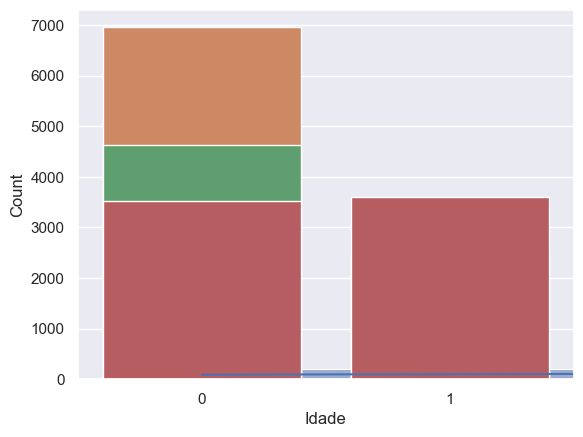

In [30]:
sns.histplot(df['Idade'], kde=True)
sns.countplot(data=df, x='VIP')
sns.countplot(data=df, x='AllInclusive')
sns.countplot(data=df, x='Sobrevivente')

In [31]:
# Codificação de Deck usando Label Encoding
df['Deck'] = df['Deck'].astype('category').cat.codes

# Codificação de PosicaoCabine (P = 1, S = 0)
df['PosicaoCabine'] = df['PosicaoCabine'].map({'P': 1, 'S': 0})


In [32]:
print(df)

     IDpassageiro                Nome  Deck  NumeroCabine  PosicaoCabine  \
0         5647_02   Chabih Matoltuble     2           178              1   
1         0107_01         Coobix Hart     3             2              0   
2         4158_01        Doryn Noeley     4           273              0   
3         1316_01      Sadrus Quelfly     4            95              0   
4         9069_05  Mirfark Taketiatim     1           297              1   
...           ...                 ...   ...           ...            ...   
7119      5971_01        Jayrin Kinad     5          1230              1   
7120      6135_01      Joanie Ellahan     5          1272              1   
7121      1000_01          Alus Harte     3            39              1   
7122      8701_01        Hammet Rekle     5          1789              1   
7123      8318_03          Hark Ropie     5          1711              1   

     Procedencia Destino  Idade  VIP  AllInclusive  ServicoCabine  \
0        America  

In [37]:
cols = ["Sobrevivente", "Idade", "NumeroCabine", "Deck", "PosicaoCabine", "VIP", "AllInclusive"]
train_corr = df[cols].corr()
train_corr

,Sobrevivente,Idade,NumeroCabine,Deck,PosicaoCabine,VIP,AllInclusive
Sobrevivente,1.000000,-0.083369,-0.037309,-0.109646,-0.104908,-0.033461,0.462834
Idade,-0.083369,1.000000,-0.129233,-0.243662,-0.009581,0.097218,-0.076830
NumeroCabine,-0.037309,-0.129233,1.000000,0.533664,0.045893,-0.101453,-0.036143
Deck,-0.109646,-0.243662,0.533664,1.000000,0.044909,-0.186942,0.022825
PosicaoCabine,-0.104908,-0.009581,0.045893,0.044909,1.000000,0.014173,-0.030423
VIP,-0.033461,0.097218,-0.101453,-0.186942,0.014173,1.000000,-0.077251
AllInclusive,0.462834,-0.076830,-0.036143,0.022825,-0.030423,-0.077251,1.000000


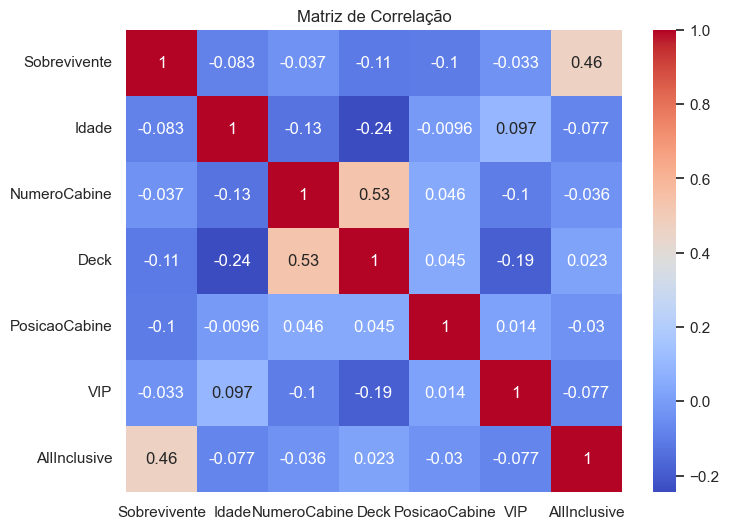

In [38]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()